## Loading the key libraries

In [1]:
import sys
import pandas as pd
import numpy as np
import re

print(f"pandas version {pd.__version__}")
print(f"numpy version {np.__version__}")
print("\n".join(f"Python {sys.version}".split("|")))

pandas version 2.1.1
numpy version 1.24.3
Python 3.11.5 (main, Sep 11 2023, 13:54:46) [GCC 11.2.0]


## A comment on file formats

The most common simple format for tabular data is comma separated or tab separated (`csv` or `tsv`).

Newer formats such as `arrow` and `parquet` are more efficient in storage and faster to load.

Pandas 2.0 can handle these newer formats.


## Reading a dataframe

In [2]:
# read from a csv file
penguins = pd.read_csv("data/penguins-raw.csv")
# read from a url
# url = "https://raw.githubusercontent.com/mcnakhaee/palmerpenguins/master/palmerpenguins/data/penguins-raw.csv"
# penguins = pd.read_csv(url)
# read from an excel file
# penguins = pd.read_excel('file.xlsx')
rows, cols = penguins.shape
print(f"Rows: {rows}, Columns: {cols}")
print(f"Columns:", "\n".join(penguins.columns))

Rows: 344, Columns: 17
Columns: studyName
Sample Number
Species
Region
Island
Stage
Individual ID
Clutch Completion
Date Egg
Culmen Length (mm)
Culmen Depth (mm)
Flipper Length (mm)
Body Mass (g)
Sex
Delta 15 N (o/oo)
Delta 13 C (o/oo)
Comments


## Series 

Each column of a dataframe is a series accessed by name.

In [3]:
penguins["Culmen Length (mm)"]

0      39.1
1      39.5
2      40.3
3       NaN
4      36.7
       ... 
339    55.8
340    43.5
341    49.6
342    50.8
343    50.2
Name: Culmen Length (mm), Length: 344, dtype: float64

Note the last row:
- Name
- Length
- dtype

Types are "inferred" by the read_csv function.

## Another example

In [4]:
penguins['Date Egg']

0      2007-11-11
1      2007-11-11
2      2007-11-16
3      2007-11-16
4      2007-11-16
          ...    
339    2009-11-19
340    2009-11-21
341    2009-11-21
342    2009-11-21
343    2009-11-21
Name: Date Egg, Length: 344, dtype: object

Here the type is "object" which is the generic python object.  But these are clearly supposed to be dates. We'll fix that later.

## Alternative syntax

In [5]:
# if the column name is simple, you can use a simpler syntax.
penguins.Sex

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339      MALE
340    FEMALE
341      MALE
342      MALE
343    FEMALE
Name: Sex, Length: 344, dtype: object

## Value Counts

The `value_counts` method returns a summary series.

In [6]:
penguins['Island'].value_counts()

Island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [7]:
penguins['Species'].value_counts()

Species
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64

## Selecting a subset of columns

In [8]:
simpler = penguins[['Species', 'Body Mass (g)', 'Flipper Length (mm)']]
simpler.head()

,Species,Body Mass (g),Flipper Length (mm)
0,Adelie Penguin (Pygoscelis adeliae),3750.0,181.0
1,Adelie Penguin (Pygoscelis adeliae),3800.0,186.0
2,Adelie Penguin (Pygoscelis adeliae),3250.0,195.0
3,Adelie Penguin (Pygoscelis adeliae),NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),3450.0,193.0


## Index

A dataframe has an index, which can be just the numbers from 0 to N as in this case.

In [9]:
penguins.index

RangeIndex(start=0, stop=344, step=1)

## Columns and Rows

`loc` allows you to access individual elements.

In [10]:
# The 23rd row
penguins.loc[23,:]

studyName                                          PAL0708
Sample Number                                           24
Species                Adelie Penguin (Pygoscelis adeliae)
Region                                              Anvers
Island                                              Biscoe
Stage                                   Adult, 1 Egg Stage
Individual ID                                        N12A2
Clutch Completion                                      Yes
Date Egg                                        2007-11-12
Culmen Length (mm)                                    38.2
Culmen Depth (mm)                                     18.1
Flipper Length (mm)                                  185.0
Body Mass (g)                                       3950.0
Sex                                                   MALE
Delta 15 N (o/oo)                                  8.43423
Delta 13 C (o/oo)                                -25.22664
Comments                                               N

In [11]:
penguins.loc[23,'Culmen Length (mm)']

38.2

In [12]:
penguins.loc[23:28,['Sex','Date Egg']]

,Sex,Date Egg
23,MALE,2007-11-12
24,MALE,2007-11-10
25,FEMALE,2007-11-10
26,MALE,2007-11-12
27,FEMALE,2007-11-12
28,FEMALE,2007-11-10


## Filtering

Filtering is done by using a boolean series as an index.  

In [13]:
penguins['Sex']=='FEMALE'

0      False
1       True
2       True
3      False
4       True
       ...  
339    False
340     True
341    False
342    False
343     True
Name: Sex, Length: 344, dtype: bool

In [14]:
females = penguins[penguins['Sex']=='FEMALE']
females.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,2007-11-15,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,Nest never observed with full clutch.
12,PAL0708,13,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N7A1,Yes,2007-11-15,41.1,17.6,182.0,3200.0,FEMALE,NaN,NaN,Not enough blood for isotopes.


An alternative syntax is to use query.  The quoting rules here can be tricky.
The query is a string, and column names are set off by backticks.  Using
two different types of quotes allows the query to include a string.

In [15]:
females = penguins.query("`Sex`=='FEMALE'")
females.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,2007-11-15,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,Nest never observed with full clutch.
12,PAL0708,13,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N7A1,Yes,2007-11-15,41.1,17.6,182.0,3200.0,FEMALE,NaN,NaN,Not enough blood for isotopes.


## Fancier filtering

In [16]:
penguins[penguins["Flipper Length (mm)"]>penguins["Body Mass (g)"]/20]

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,2007-11-16,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,NaN
8,PAL0708,9,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A1,Yes,2007-11-09,34.1,18.1,193.0,3475.0,NaN,NaN,NaN,No blood sample obtained.
10,PAL0708,11,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N6A1,Yes,2007-11-09,37.8,17.1,186.0,3300.0,NaN,8.63243,-25.21315,No blood sample obtained for sexing.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


## Missing values

Dealing with missing values is a central problem in data science.  One way to identify how many misssing values are out there is as follows:

In [17]:
## Uses the fact that logical True counts as one, False as zero
## sum() method sums by columns
penguins.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     11
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               290
dtype: int64

Nearly all of the comments are empty.  What are they?

In [18]:
comments = penguins['Comments'].value_counts()
comments

Comments
Nest never observed with full clutch.                                   34
Not enough blood for isotopes.                                           7
Sexing primers did not amplify.                                          4
No blood sample obtained.                                                2
No blood sample obtained for sexing.                                     2
Adult not sampled.                                                       1
Nest never observed with full clutch. Not enough blood for isotopes.     1
Sexing primers did not amplify. Not enough blood for isotopes.           1
Adult not sampled. Nest never observed with full clutch.                 1
No delta15N data received from lab.                                      1
Name: count, dtype: int64

Let's save the comments separately and look at the rest.

In [19]:
# drop normally drops rows, but with axis=1 it drops columns
penguins = penguins.drop('Comments',axis=1)

Various options:
- drop rows with missing values
- impute the missing values somehow

## Drop rows with missing values

In [20]:
# This makes a boolean where a row is True provided at least one of its entries are NA
na_rows = (penguins.isna().any(axis=1))
print(f"{na_rows.sum()} rows have NA somewhere outside of comments")

20 rows have NA somewhere outside of comments


In [21]:
# here we keep rows only if no NA's.  Can also use notna().
penguins_nona = penguins.loc[~na_rows,:]

## Imputation

We saw above that culmen length has 2 missing values. We can use `fillna` to
replace the missing values with something (like the mean or median or zero).

In [22]:
# using equality w/o copy creates another reference.
penguins_imputed = penguins.copy()
culmen_mean = penguins_imputed['Culmen Length (mm)'].mean() # how does this handle NA values?
print(f"Culmen length mean is {culmen_mean}")
penguins_imputed['Culmen Length (mm)'] = penguins_imputed['Culmen Length (mm)'].fillna(culmen_mean)

Culmen length mean is 43.9219298245614


There are many other imputation methods.  For example, if the data is ordered, you can fill 
missing data with linear interpolation. (See the `interpolate` method).

## Data types

As we saw above, the types of the columns are inferred when the data is read.  But it's not always correct.  For example, the "Date Egg" column is supposed to be a date but it's shown as a generic python object. 

Using the correct type can greatly improve performance as generic Python arguments
are inefficient.

In pandas 1.0 strings are always treated as objects but in pandas 2.0 there is a `StringDtype`.

The most common types are:
- object
- float64
- datetime (datetime64[ns])
- int64
- bool 

One may also find categorical types. 

In [23]:
penguins.dtypes

studyName               object
Sample Number            int64
Species                 object
Region                  object
Island                  object
Stage                   object
Individual ID           object
Clutch Completion       object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
dtype: object

## Setting datatypes

Here's an example where we manually make sex a categorical type.

In [24]:
penguins = penguins.astype({'Sex':'category'})
penguins['Sex']

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339      MALE
340    FEMALE
341      MALE
342      MALE
343    FEMALE
Name: Sex, Length: 344, dtype: category
Categories (2, object): ['FEMALE', 'MALE']

One can also pass a dictionary setting the types of columns as an argument when
you read them from the csv file.

## Creating new columns 


Simplifying the species name.

In [25]:
def first_word(x):
    return x.split()[0]
penguins['SimpleSpecies'] = penguins['Species'].map(first_word)

Rewriting the body mass in kilograms.

In [26]:
penguins['Body Mass (kg)'] = penguins['Body Mass (g)']/1000

## Sorting

In [27]:
penguins_small = penguins[['Species','Island','Body Mass (g)']]
penguins_small.sort_values('Body Mass (g)')
# ascending = False for descending order
# na_position = 'first' or 'last' (default is 'last')
# can also provide a key which is a function of prototype Series -> Series
# inplace = True doesn't return a new dataframe, sorts the given one in place

,Species,Island,Body Mass (g)
314,Chinstrap penguin (Pygoscelis antarctica),Dream,2700.0
64,Adelie Penguin (Pygoscelis adeliae),Biscoe,2850.0
58,Adelie Penguin (Pygoscelis adeliae),Biscoe,2850.0
116,Adelie Penguin (Pygoscelis adeliae),Torgersen,2900.0
98,Adelie Penguin (Pygoscelis adeliae),Dream,2900.0
...,...,...,...
269,Gentoo penguin (Pygoscelis papua),Biscoe,6000.0
185,Gentoo penguin (Pygoscelis papua),Biscoe,6050.0
169,Gentoo penguin (Pygoscelis papua),Biscoe,6300.0
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN


## Grouping

Grouping is a powerful tool.  Let's first
group our penguins by species.  The result is a "grouped" object which needs to pass through a summarize operation to
be useful. 

In [28]:
penguins_by_species = penguins.groupby('Species')
penguins_by_species

## Summarizing

In [29]:
# describe computes basic descriptive statistics
penguins_by_species['Body Mass (g)'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Adelie Penguin (Pygoscelis adeliae),151.0,3700.662252,458.566126,2850.0,3350.0,3700.0,4000.0,4775.0
Chinstrap penguin (Pygoscelis antarctica),68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo penguin (Pygoscelis papua),123.0,5076.016260,504.116237,3950.0,4700.0,5000.0,5500.0,6300.0


In [30]:
# this fails because some columns aren't numeric
penguins_by_species.mean(numeric_only=True)

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (kg)
Species,,,,,,,,
Adelie Penguin (Pygoscelis adeliae),76.5,38.791391,18.346358,189.953642,3700.662252,8.859733,-25.804194,3.700662
Chinstrap penguin (Pygoscelis antarctica),34.5,48.833824,18.420588,195.823529,3733.088235,9.356155,-24.546542,3.733088
Gentoo penguin (Pygoscelis papua),62.5,47.504878,14.982114,217.186992,5076.016260,8.245338,-26.185298,5.076016


In [31]:
penguins_by_species.count()

,studyName,Sample Number,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),SimpleSpecies,Body Mass (kg)
Species,,,,,,,,,,,,,,,,,
Adelie Penguin (Pygoscelis adeliae),152,152,152,152,152,152,152,152,151,151,151,151,146,141,141,152,151
Chinstrap penguin (Pygoscelis antarctica),68,68,68,68,68,68,68,68,68,68,68,68,68,67,68,68,68
Gentoo penguin (Pygoscelis papua),124,124,124,124,124,124,124,124,123,123,123,123,119,122,122,124,123


## MultiIndex

In [32]:
penguins_by_sex_and_species = penguins.groupby(['Sex','Species'])
penguins_by_sex_and_species['Body Mass (g)'].describe().round()

/tmp/ipykernel_390774/3464751443.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  penguins_by_sex_and_species = penguins.groupby(['Sex','Species'])


count    mean    std  \
Sex    Species                                                           
FEMALE Adelie Penguin (Pygoscelis adeliae)         73.0  3369.0  269.0   
       Chinstrap penguin (Pygoscelis antarctica)   34.0  3527.0  285.0   
       Gentoo penguin (Pygoscelis papua)           58.0  4680.0  282.0   
MALE   Adelie Penguin (Pygoscelis adeliae)         73.0  4043.0  347.0   
       Chinstrap penguin (Pygoscelis antarctica)   34.0  3939.0  362.0   
       Gentoo penguin (Pygoscelis papua)           61.0  5485.0  313.0   

                                                     min     25%     50%  \
Sex    Species                                                             
FEMALE Adelie Penguin (Pygoscelis adeliae)        2850.0  3175.0  3400.0   
       Chinstrap penguin (Pygoscelis antarctica)  2700.0  3362.0  3550.0   
       Gentoo penguin (Pygoscelis papua)          3950.0  4462.0  4700.0   
MALE   Adelie Penguin (Pygoscelis adeliae)        3325.0  3800.0  4000.0   
       Chinstrap penguin (Pygoscelis antarctica)  3250.0  3731.0  3950.0   
       Gentoo penguin (Pygoscelis papua)          4750.0  5300.0  5500.0   

                                                     75%     max  
Sex    Species                                                    
FEMALE Adelie Penguin (Pygoscelis adeliae)        3550.0  3900.0  
       Chinstrap penguin (Pygoscelis antarctica)  3694.0  4150.0  
       Gentoo penguin (Pygoscelis papua)          4875.0  5200.0  
MALE   Adelie Penguin (Pygoscelis adeliae)        4300.0  4775.0  
       Chinstrap penguin (Pygoscelis antarctica)  4100.0  4800.0  
       Gentoo penguin (Pygoscelis papua)          5700.0  6300.0

In [33]:
# pivot tables
penguins_by_sex_and_species['Body Mass (g)'].mean().reset_index().pivot(index='Sex',columns='Species',values='Body Mass (g)')

Species,Adelie Penguin (Pygoscelis adeliae),Chinstrap penguin (Pygoscelis antarctica),Gentoo penguin (Pygoscelis papua)
Sex,,,
FEMALE,3368.835616,3527.205882,4679.741379
MALE,4043.493151,3938.970588,5484.836066


## Pandas plotting

Some simple plots are available directly from pandas.

/tmp/ipykernel_390774/3368902341.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  penguins[penguins['Species'].str.startswith("Adel")].groupby(['Sex'])['Body Mass (g)'].hist(bins=30,legend=True)


Sex
FEMALE    Axes(0.125,0.11;0.775x0.77)
MALE      Axes(0.125,0.11;0.775x0.77)
Name: Body Mass (g), dtype: object

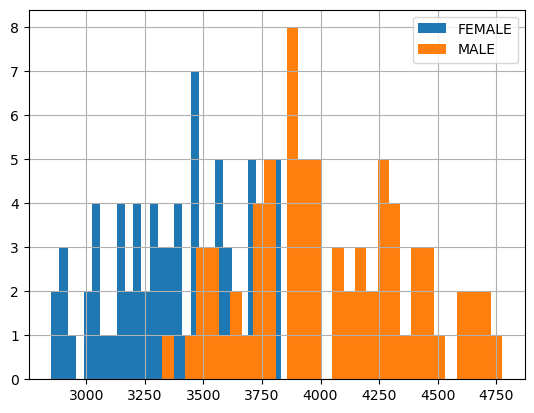

In [34]:
penguins[penguins['Species'].str.startswith("Adel")].groupby(['Sex'])['Body Mass (g)'].hist(bins=30,legend=True)

## Excel files

We can read an excel file.  This particular one is complicated for various reasons, including the fact that the column heads are in the third row, not at the top. Also there are a bunch of footnotes starting in row 510 that we don't want. So we don't read them in. 

In [36]:
crime2019 = pd.read_excel("data/Violent Crime-by state-2019-table-5.xls",header=3,nrows=510)
crime2019

,State,Area,Unnamed: 2,Population,Violent \ncrime1,Murder and \nnonnegligent \nmanslaughter,Rape2,Robbery,Aggravated \nassault,Property \ncrime,Burglary,Larceny-theft,Motor \nvehicle \ntheft
0,ALABAMA,Metropolitan Statistical Area,NaN,3728978.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Area actually reporting,0.766,12880,182.0,1141.0,1706.0,9851,65789,12388.0,47299.0,6102.0
2,NaN,NaN,Estimated total,1.000,19951,300.0,1542.0,3432.0,14677,104658,20728.0,73857.0,10073.0
3,NaN,Cities outside metropolitan areas,NaN,528518.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Area actually reporting,0.893,3327,36.0,297.0,266.0,2728,17915,3140.0,13382.0,1393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,NaN,Nonmetropolitan counties,NaN,160615.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,NaN,NaN,Area actually reporting,0.921,194,0.0,39.0,0.0,155,973,170.0,716.0,87.0
507,NaN,NaN,Estimated total,1.000,213,0.0,42.0,0.0,171,1065,188.0,781.0,96.0
508,NaN,State Total,NaN,578759.000,1258,13.0,324.0,67.0,854,9093,1396.0,6984.0,713.0


The column names have newlines in them and we'd like to get rid of those. 

In [37]:
crime2019.columns = [x.replace(" \n","_") for x in crime2019.columns]
crime2019

,State,Area,Unnamed: 2,Population,Violent_crime1,Murder and_nonnegligent_manslaughter,Rape2,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny-theft,Motor_vehicle_theft
0,ALABAMA,Metropolitan Statistical Area,NaN,3728978.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Area actually reporting,0.766,12880,182.0,1141.0,1706.0,9851,65789,12388.0,47299.0,6102.0
2,NaN,NaN,Estimated total,1.000,19951,300.0,1542.0,3432.0,14677,104658,20728.0,73857.0,10073.0
3,NaN,Cities outside metropolitan areas,NaN,528518.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Area actually reporting,0.893,3327,36.0,297.0,266.0,2728,17915,3140.0,13382.0,1393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,NaN,Nonmetropolitan counties,NaN,160615.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,NaN,NaN,Area actually reporting,0.921,194,0.0,39.0,0.0,155,973,170.0,716.0,87.0
507,NaN,NaN,Estimated total,1.000,213,0.0,42.0,0.0,171,1065,188.0,781.0,96.0
508,NaN,State Total,NaN,578759.000,1258,13.0,324.0,67.0,854,9093,1396.0,6984.0,713.0


Let's look at the states. 

In [38]:
states = crime2019["State"].dropna().values
states

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA3',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI4',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE',
       'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA',
       'NORTH DAKOTA', 'OHIO4', 'OKLAHOMA', 'OREGON4', 'PENNSYLVANIA',
       'PUERTO RICO', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'], dtype=object)

Some have footnotes at the end.  We don't want them.

In [39]:
states = [re.sub("[0-9$]","",x) for x in states]
states

['ALABAMA',
 'ALASKA',
 'ARIZONA',
 'ARKANSAS',
 'CALIFORNIA',
 'COLORADO',
 'CONNECTICUT',
 'DELAWARE',
 'DISTRICT OF COLUMBIA',
 'FLORIDA',
 'GEORGIA',
 'HAWAII',
 'IDAHO',
 'ILLINOIS',
 'INDIANA',
 'IOWA',
 'KANSAS',
 'KENTUCKY',
 'LOUISIANA',
 'MAINE',
 'MARYLAND',
 'MASSACHUSETTS',
 'MICHIGAN',
 'MINNESOTA',
 'MISSISSIPPI',
 'MISSOURI',
 'MONTANA',
 'NEBRASKA',
 'NEVADA',
 'NEW HAMPSHIRE',
 'NEW JERSEY',
 'NEW MEXICO',
 'NEW YORK',
 'NORTH CAROLINA',
 'NORTH DAKOTA',
 'OHIO',
 'OKLAHOMA',
 'OREGON',
 'PENNSYLVANIA',
 'PUERTO RICO',
 'RHODE ISLAND',
 'SOUTH CAROLINA',
 'SOUTH DAKOTA',
 'TENNESSEE',
 'TEXAS',
 'UTAH',
 'VERMONT',
 'VIRGINIA',
 'WASHINGTON',
 'WEST VIRGINIA',
 'WISCONSIN',
 'WYOMING']

]
We don't want to include DC or Puerto Rico.

In [40]:
states = [x for x in states if x!='DISTRICT OF COLUMBIA' and x!='PUERTO RICO']
states

['ALABAMA',
 'ALASKA',
 'ARIZONA',
 'ARKANSAS',
 'CALIFORNIA',
 'COLORADO',
 'CONNECTICUT',
 'DELAWARE',
 'FLORIDA',
 'GEORGIA',
 'HAWAII',
 'IDAHO',
 'ILLINOIS',
 'INDIANA',
 'IOWA',
 'KANSAS',
 'KENTUCKY',
 'LOUISIANA',
 'MAINE',
 'MARYLAND',
 'MASSACHUSETTS',
 'MICHIGAN',
 'MINNESOTA',
 'MISSISSIPPI',
 'MISSOURI',
 'MONTANA',
 'NEBRASKA',
 'NEVADA',
 'NEW HAMPSHIRE',
 'NEW JERSEY',
 'NEW MEXICO',
 'NEW YORK',
 'NORTH CAROLINA',
 'NORTH DAKOTA',
 'OHIO',
 'OKLAHOMA',
 'OREGON',
 'PENNSYLVANIA',
 'RHODE ISLAND',
 'SOUTH CAROLINA',
 'SOUTH DAKOTA',
 'TENNESSEE',
 'TEXAS',
 'UTAH',
 'VERMONT',
 'VIRGINIA',
 'WASHINGTON',
 'WEST VIRGINIA',
 'WISCONSIN',
 'WYOMING']

Finally, we want to pull out the violent crime numbers for
the total area of the state. Notice
that Puerto Rico and DC use "Total", not
"State Total", for Area and so they will
be excluded.

In [41]:
vcrime2019 = crime2019[crime2019['Area'] == 'State Total']['Violent_crime1'].values
vcrime2019

array([25046, 6343, 33141, 17643, 174331, 21938, 6546, 4115, 81270, 36170,
       4042, 4000, 51561, 24966, 8410, 11968, 9701, 25537, 1548, 27456,
       22578, 43686, 13332, 8272, 30380, 4328, 5821, 15210, 2074, 18375,
       17450, 69764, 38995, 2169, 34269, 17086, 11995, 39228, 2342, 26323,
       3530, 40647, 121474, 7553, 1262, 17753, 22377, 5674, 17070, 1258],
      dtype=object)